In [1]:
import pandas as  pd
import numpy as np
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [2]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

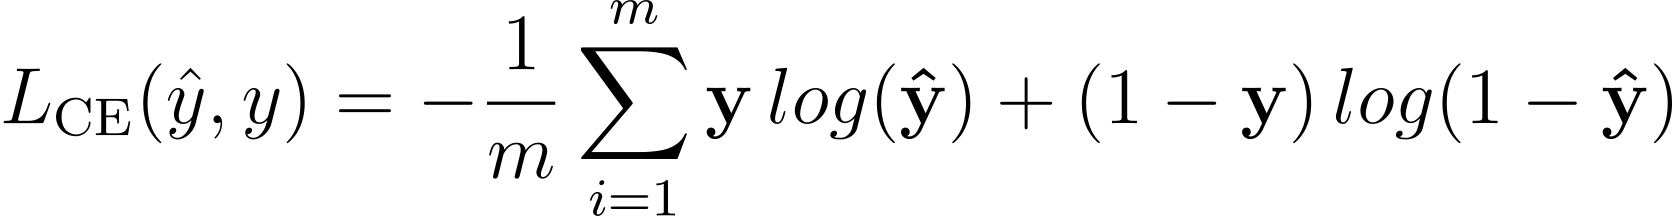

In [3]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]#[.8,.9,0,0,1,1]=[.8,.9,1e-15,1e-15,1,1]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]#[.8,.9,1e-15,1e-15,(1-1e-15),(1-1e-15)]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [5]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

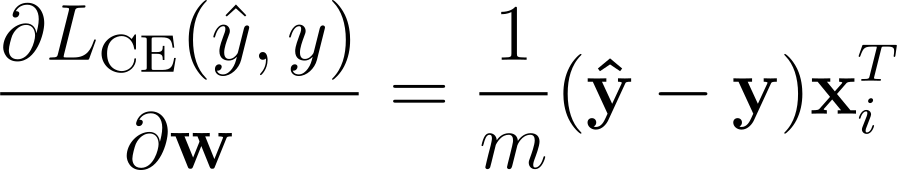

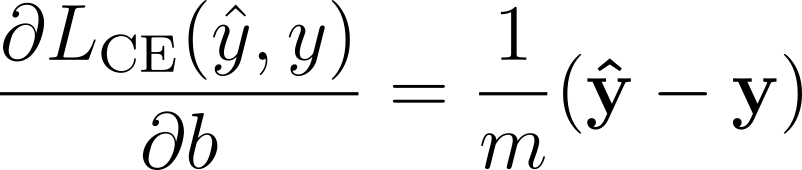

https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/

In [7]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold=0.000005):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [11]:
w1,w2,bias=gradient_descent(X_train_scaled["age"], X_train_scaled["affordibility"], y_train, 5000)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.6812647787377568
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.29775789977965383, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.37150947240035115, loss:0.6431523291301916
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.4350664302689159, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.4899449005893882, loss:0.6234717079975919
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522855, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894964, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567943, w2:0.7965748796787705, bias:-0.6155315088627656, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557358, w2:0.7973647616854131, b

Epoch:116, w1:2.4142202952505927, w2:1.3256368557876617, bias:-1.772838073810153, loss:0.5316436602986057
Epoch:117, w1:2.427385892828985, w2:1.3273256475595065, bias:-1.7795606740855376, loss:0.5311992737322607
Epoch:118, w1:2.440530065534521, w2:1.328985394517677, bias:-1.7862522572596642, loss:0.5307570568107249
Epoch:119, w1:2.4536527554538115, w2:1.3306166618213877, bias:-1.7929132239766132, loss:0.5303169887853427
Epoch:120, w1:2.46675390679823, w2:1.332220003613633, bias:-1.7995439676856702, loss:0.5298790493957434
Epoch:121, w1:2.479833465862666, w2:1.3337959632481655, bias:-1.8061448747852695, loss:0.5294432188529624
Epoch:122, w1:2.4928913809851023, w2:1.3353450735113397, bias:-1.8127163247637639, loss:0.5290094778232024
Epoch:123, w1:2.505927602506996, w2:1.336867856838949, bias:-1.8192586903370926, loss:0.5285778074122077
Epoch:124, w1:2.518942082734439, w2:1.3383648255281848, bias:-1.82577233758343, loss:0.5281481891502279
Epoch:125, w1:2.5319347759000843, w2:1.33983648194

Epoch:231, w1:3.783584659679165, w2:1.417340013040245, bias:-2.407457032822888, loss:0.49151901778021734
Epoch:232, w1:3.7942347425994543, w2:1.4177072077093518, bias:-2.412123970719756, loss:0.4912475268566808
Epoch:233, w1:3.804864223770903, w2:1.4180717143600363, bias:-2.4167803219928548, loss:0.4909771178762568
Epoch:234, w1:3.8154731409509055, w2:1.418433594987496, bias:-2.4214261506059125, loss:0.49070778576057195
Epoch:235, w1:3.8260615320589157, w2:1.4187929103882317, bias:-2.426061519666623, loss:0.49043952546159064
Epoch:236, w1:3.83662943517138, w2:1.4191497201820455, bias:-2.4306864914412545, loss:0.4901723319612717
Epoch:237, w1:3.8471768885167634, w2:1.41950408283363, bias:-2.4353011273689953, loss:0.4899062002712329
Epoch:238, w1:3.857703930470663, w2:1.4198560556737607, bias:-2.4399054880760342, loss:0.48964112543242444
Epoch:239, w1:3.8682105995510105, w2:1.4202056949200956, bias:-2.444499633389389, loss:0.48937710251481087
Epoch:240, w1:3.8786969344133597, w2:1.420553

Epoch:337, w1:4.805544602170057, w2:1.4489962250047304, bias:-2.852450392525183, loss:0.467908033037264
Epoch:338, w1:4.814234222962166, w2:1.4492705776605888, bias:-2.8562382504208115, loss:0.46772766409232197
Epoch:339, w1:4.822907499966253, w2:1.4495449517635393, bias:-2.860019415307658, loss:0.4675479661847561
Epoch:340, w1:4.831564471861215, w2:1.4498193532881727, bias:-2.8637939080030708, loss:0.46736893639594346
Epoch:341, w1:4.840205177255373, w2:1.4500937880454414, bias:-2.8675617491656573, loss:0.4671905718215625
Epoch:342, w1:4.848829654685914, w2:1.4503682616858278, bias:-2.8713229592975185, loss:0.46701286957151705
Epoch:343, w1:4.85743794261834, w2:1.4506427797024561, bias:-2.875077558746444, loss:0.4668358267698594
Epoch:344, w1:4.866030079445939, w2:1.450917347434149, bias:-2.8788255677080725, loss:0.4666594405547148
Epoch:345, w1:4.874606103489267, w2:1.4511919700684275, bias:-2.882567006228014, loss:0.4664837080782067
Epoch:346, w1:4.883166052995643, w2:1.451466652644

Epoch:464, w1:5.790440628936692, w2:1.4848931075165537, bias:-3.285676556898031, loss:0.44952763341172464
Epoch:465, w1:5.797337471807666, w2:1.485185657142494, bias:-3.2887441439901024, loss:0.44941321397012096
Epoch:466, w1:5.804222236046974, w2:1.4854783316700793, bias:-3.291806889244466, loss:0.4492991878655977
Epoch:467, w1:5.81109494995919, w2:1.4857711297812415, bias:-3.294864803303088, loss:0.4491855535084689
Epoch:468, w1:5.817955641770373, w2:1.4860640501511484, bias:-3.29791789676925, loss:0.4490723093164238
Epoch:469, w1:5.824804339628237, w2:1.4863570914484907, bias:-3.3009661802078503, loss:0.44895945371448925
Epoch:470, w1:5.831641071602318, w2:1.4866502523357652, bias:-3.3040096641457035, loss:0.44884698513499227
Epoch:471, w1:5.838465865684142, w2:1.4869435314695505, bias:-3.307048359071834, loss:0.44873490201752114
Epoch:472, w1:5.845278749787397, w2:1.4872369275007782, bias:-3.310082275437768, loss:0.44862320280889123
Epoch:473, w1:5.852079751748099, w2:1.48753043907

Epoch:572, w1:6.4708870138506915, w2:1.5169281275963187, bias:-3.5909924817298893, loss:0.43915416514156347
Epoch:573, w1:6.476627843773947, w2:1.5172262217201886, bias:-3.593592005061385, loss:0.43907436484933204
Epoch:574, w1:6.48235923539623, w2:1.5175242957446684, bias:-3.596187657740623, loss:0.4389948220870256
Epoch:575, w1:6.488081209603276, w2:1.5178223485000726, bias:-3.598779447399076, loss:0.43891553587942816
Epoch:576, w1:6.4937937872222795, w2:1.5181203788216417, bias:-3.601367381647628, loss:0.4388365052555984
Epoch:577, w1:6.499496989022072, w2:1.5184183855495557, bias:-3.6039514680766627, loss:0.4387577292488489
Epoch:578, w1:6.5051908357133, w2:1.5187163675289455, bias:-3.6065317142561497, loss:0.4386792068967236
Epoch:579, w1:6.510875347948605, w2:1.519014323609906, bias:-3.6091081277357335, loss:0.4386009372409789
Epoch:580, w1:6.5165505463228, w2:1.5193122526475067, bias:-3.611680716044819, loss:0.4385229193275619
Epoch:581, w1:6.522216451373049, w2:1.51961015350180

Epoch:669, w1:6.9866904905205915, w2:1.5455945659912929, bias:-3.8261834045149703, loss:0.4324823652903563
Epoch:670, w1:6.991605012461594, w2:1.545886000883875, bias:-3.828440237459978, loss:0.43242356863759235
Epoch:671, w1:6.996511874443276, w2:1.5461773252973912, bias:-3.8306938551054572, loss:0.43236495206473013
Epoch:672, w1:7.0014110924457436, w2:1.5464685385312795, bias:-3.8329442634137236, loss:0.4323065149276479
Epoch:673, w1:7.0063026824059715, w2:1.5467596398892778, bias:-3.83519146833266, loss:0.43224825658489735
Epoch:674, w1:7.011186660217938, w2:1.5470506286794075, bias:-3.8374354757957616, loss:0.4321901763976891
Epoch:675, w1:7.01606304173276, w2:1.547341504213958, bias:-3.839676291722185, loss:0.432132273729882
Epoch:676, w1:7.020931842758835, w2:1.547632265809471, bias:-3.84191392201679, loss:0.4320745479479701
Epoch:677, w1:7.0257930790619705, w2:1.5479229127867247, bias:-3.8441483725701877, loss:0.43201699842106966
Epoch:678, w1:7.030646766365521, w2:1.54821344447

Epoch:776, w1:7.472067733506358, w2:1.5760330132037008, bias:-4.050544049061298, loss:0.4270970704765525
Epoch:777, w1:7.476245364246772, w2:1.5763094250469682, bias:-4.05248800929346, loss:0.4270543613680149
Epoch:778, w1:7.480416825336381, w2:1.5765856726783776, bias:-4.0544293184931, loss:0.4270117763768116
Epoch:779, w1:7.48458212883517, w2:1.5768617557680893, bias:-4.05636798130252, loss:0.4269693150846697
Epoch:780, w1:7.488741286772353, w2:1.5771376739889258, bias:-4.058304002353522, loss:0.42692697707494975
Epoch:781, w1:7.492894311146473, w2:1.5774134270163584, bias:-4.060237386267444, loss:0.42688476193263863
Epoch:782, w1:7.497041213925497, w2:1.5776890145284936, bias:-4.062168137655181, loss:0.42684266924434217
Epoch:783, w1:7.501182007046909, w2:1.5779644362060603, bias:-4.064096261117225, loss:0.426800698598278
Epoch:784, w1:7.505316702417805, w2:1.578239691732396, bias:-4.066021761243684, loss:0.4267588495842688
Epoch:785, w1:7.50944531191499, w2:1.5785147807934343, bias

Epoch:901, w1:7.950011609111353, w2:1.6092299480051198, bias:-4.274373402106341, loss:0.4226017133089936
Epoch:902, w1:7.953502575583579, w2:1.6094840053112849, bias:-4.276018889231678, loss:0.42257173336958664
Epoch:903, w1:7.956988668864077, w2:1.6097378740464838, bias:-4.277662232728414, loss:0.4225418359185398
Epoch:904, w1:7.960469897812615, w2:1.6099915541258325, bias:-4.2793034361264946, loss:0.42251202069516575
Epoch:905, w1:7.963946271267905, w2:1.6102450454658153, bias:-4.2809425029483865, loss:0.42248228743972854
Epoch:906, w1:7.967417798047665, w2:1.6104983479842767, bias:-4.282579436709093, loss:0.4224526358934389
Epoch:907, w1:7.970884486948679, w2:1.6107514616004146, bias:-4.284214240916176, loss:0.4224230657984508
Epoch:908, w1:7.974346346746861, w2:1.6110043862347723, bias:-4.285846919069774, loss:0.4223935768978576
Epoch:909, w1:7.9778033861973165, w2:1.611257121809231, bias:-4.287477474662622, loss:0.4223641689356878
Epoch:910, w1:7.9812556140344, w2:1.61150966824700

Epoch:1026, w1:8.35123991933557, w2:1.6395103568613003, bias:-4.464499633680396, loss:0.41941903845313655
Epoch:1027, w1:8.354184264205713, w2:1.6397405541806997, bias:-4.465902323735548, loss:0.4193976169090757
Epoch:1028, w1:8.357124697992768, w2:1.6399705608373676, bias:-4.467303259111158, loss:0.41937625153682756
Epoch:1029, w1:8.360061227344751, w2:1.6402003768690607, bias:-4.468702442536555, loss:0.4193549421689164
Epoch:1030, w1:8.362993858894956, w2:1.640430002314199, bias:-4.470099876735633, loss:0.4193336886384394
Epoch:1031, w1:8.365922599261994, w2:1.640659437211861, bias:-4.4714955644268555, loss:0.41931249077906524
Epoch:1032, w1:8.368847455049837, w2:1.64088868160178, bias:-4.472889508323278, loss:0.4192913484250303
Epoch:1033, w1:8.371768432847853, w2:1.6411177355243398, bias:-4.474281711132556, loss:0.4192702614111383
Epoch:1034, w1:8.374685539230853, w2:1.6413465990205713, bias:-4.475672175556959, loss:0.4192492295727567
Epoch:1035, w1:8.377598780759127, w2:1.64157527

Epoch:1134, w1:8.64791356308021, w2:1.6632808669856893, bias:-4.606381112642884, loss:0.41739872036809184
Epoch:1135, w1:8.650471122060413, w2:1.6634908067746998, bias:-4.607609025047182, loss:0.4173825037105104
Epoch:1136, w1:8.65302541053759, w2:1.663700563087681, bias:-4.608835448667349, loss:0.41736632803912577
Epoch:1137, w1:8.65557643378053, w2:1.6639101360144595, bias:-4.610060385715795, loss:0.41735019323718886
Epoch:1138, w1:8.658124197047021, w2:1.6641195256451904, bias:-4.6112838384007455, loss:0.41733409918833053
Epoch:1139, w1:8.660668705583884, w2:1.6643287320703564, bias:-4.612505808926247, loss:0.41731804577655945
Epoch:1140, w1:8.663209964626995, w2:1.6645377553807648, bias:-4.613726299492181, loss:0.41730203288626116
Epoch:1141, w1:8.66574797940132, w2:1.6647465956675453, bias:-4.614945312294272, loss:0.4172860604021963
Epoch:1142, w1:8.668282755120941, w2:1.664955253022148, bias:-4.6161628495240965, loss:0.4172701282094992
Epoch:1143, w1:8.670814296989086, w2:1.66516

Epoch:1261, w1:8.948205967838664, w2:1.6885080501551568, bias:-4.751110903430239, loss:0.41563180631966345
Epoch:1262, w1:8.950386938547739, w2:1.6886954959718479, bias:-4.752166141744482, loss:0.41561997413011187
Epoch:1263, w1:8.952565228649203, w2:1.6888827716985335, bias:-4.753220141788253, loss:0.41560817072119177
Epoch:1264, w1:8.954740842218762, w2:1.6890698774518955, bias:-4.754272905313046, loss:0.4155963960147998
Epoch:1265, w1:8.95691378332416, w2:1.6892568133487313, bias:-4.755324434067229, loss:0.4155846499330727
Epoch:1266, w1:8.959084056025201, w2:1.6894435795059521, bias:-4.756374729796052, loss:0.4155729323983865
Epoch:1267, w1:8.961251664373766, w2:1.6896301760405825, bias:-4.757423794241654, loss:0.41556124333335537
Epoch:1268, w1:8.96341661241383, w2:1.6898166030697588, bias:-4.7584716291430675, loss:0.41554958266083103
Epoch:1269, w1:8.965578904181491, w2:1.690002860710728, bias:-4.7595182362362305, loss:0.415537950303902
Epoch:1270, w1:8.967738543704977, w2:1.6901

Epoch:1404, w1:9.234689005522768, w2:1.7136429971478186, bias:-4.890224474515747, loss:0.4141983947050567
Epoch:1405, w1:9.236524533076112, w2:1.713807342694164, bias:-4.891119040197709, loss:0.414189987087977
Epoch:1406, w1:9.238357890479625, w2:1.713971535535069, bias:-4.89201258938571, loss:0.41418159916872826
Epoch:1407, w1:9.240189080844754, w2:1.7141355757942414, bias:-4.892905123447169, loss:0.4141732308963814
Epoch:1408, w1:9.242018107277286, w2:1.7142994635953854, bias:-4.893796643747211, loss:0.4141648822201552
Epoch:1409, w1:9.24384497287735, w2:1.7144631990622023, bias:-4.894687151648675, loss:0.4141565530894155
Epoch:1410, w1:9.245669680739438, w2:1.7146267823183892, bias:-4.895576648512118, loss:0.41414824345367535
Epoch:1411, w1:9.247492233952416, w2:1.7147902134876387, bias:-4.896465135695817, loss:0.41413995326259373
Epoch:1412, w1:9.249312635599537, w2:1.7149534926936387, bias:-4.897352614555778, loss:0.4141316824659757
Epoch:1413, w1:9.251130888758453, w2:1.715116620

Epoch:1529, w1:9.448247936041739, w2:1.73304188941719, bias:-4.994580712383912, loss:0.41328524440728837
Epoch:1530, w1:9.449834626509258, w2:1.7331880999947538, bias:-4.99535812936598, loss:0.4132789469660322
Epoch:1531, w1:9.451419495659048, w2:1.7333341731619551, bias:-4.996134684434479, loss:0.4132726638635105
Epoch:1532, w1:9.453002545984724, w2:1.7334801090387753, bias:-4.996910378704019, loss:0.4132663950640147
Epoch:1533, w1:9.454583779975616, w2:1.7336259077451444, bias:-4.997685213287433, loss:0.41326014053193477
Epoch:1534, w1:9.456163200116777, w2:1.733771569400941, bias:-4.998459189295783, loss:0.4132539002317603
Epoch:1535, w1:9.457740808888989, w2:1.7339170941259925, bias:-4.999232307838363, loss:0.4132476741280781
Epoch:1536, w1:9.459316608768779, w2:1.7340624820400738, bias:-5.000004570022701, loss:0.4132414621855742
Epoch:1537, w1:9.460890602228423, w2:1.7342077332629076, bias:-5.000775976954565, loss:0.4132352643690316
Epoch:1538, w1:9.462462791735954, w2:1.734352847

Epoch:1677, w1:9.664508501369552, w2:1.7532487174625924, bias:-5.100820376125248, loss:0.41249203849872934
Epoch:1678, w1:9.66585065845376, w2:1.753375865232159, bias:-5.101481478133483, loss:0.41248752178999465
Epoch:1679, w1:9.667191321125154, w2:1.7535028926830287, bias:-5.1021418655965975, loss:0.4124830150673746
Epoch:1680, w1:9.668530491332207, w2:1.7536297999255435, bias:-5.102801539400773, loss:0.41247851830695664
Epoch:1681, w1:9.669868171020248, w2:1.7537565870699698, bias:-5.103460500430856, loss:0.4124740314848916
Epoch:1682, w1:9.671204362131466, w2:1.7538832542264997, bias:-5.104118749570359, loss:0.4124695545773933
Epoch:1683, w1:9.67253906660492, w2:1.7540098015052497, bias:-5.104776287701469, loss:0.4124650875607381
Epoch:1684, w1:9.673872286376545, w2:1.7541362290162612, bias:-5.1054331157050425, loss:0.41246063041126513
Epoch:1685, w1:9.675204023379155, w2:1.7542625368695004, bias:-5.106089234460614, loss:0.41245618310537646
Epoch:1686, w1:9.676534279542453, w2:1.754

Epoch:1803, w1:9.822456030551876, w2:1.7683569758655142, bias:-5.178767866700587, loss:0.4119943799163201
Epoch:1804, w1:9.823624272469687, w2:1.7684698073614196, bias:-5.179345504075847, loss:0.4119909519823423
Epoch:1805, w1:9.824791242645919, w2:1.7685825318312582, bias:-5.179922528816799, loss:0.41198753146392586
Epoch:1806, w1:9.825956942678289, w2:1.7686951493754917, bias:-5.1804989416594545, loss:0.41198411834382914
Epoch:1807, w1:9.827121374162061, w2:1.7688076600945013, bias:-5.181074743338768, loss:0.41198071260485475
Epoch:1808, w1:9.828284538690053, w2:1.7689200640885878, bias:-5.181649934588634, loss:0.4119773142298491
Epoch:1809, w1:9.829446437852637, w2:1.769032361457972, bias:-5.182224516141892, loss:0.4119739232017016
Epoch:1810, w1:9.830607073237747, w2:1.7691445523027935, bias:-5.182798488730325, loss:0.41197053950334617
Epoch:1811, w1:9.831766446430883, w2:1.7692566367231122, bias:-5.183371853084664, loss:0.41196716311775905
Epoch:1812, w1:9.832924559015117, w2:1.76

Epoch:1902, w1:9.932184453364334, w2:1.7790235650023154, bias:-5.233093660670985, loss:0.41168843977766706
Epoch:1903, w1:9.933234175610565, w2:1.7791262756413317, bias:-5.233614058194845, loss:0.4116856687886653
Epoch:1904, w1:9.934282773088492, w2:1.779228888809981, bias:-5.234133911088336, loss:0.4116829037031264
Epoch:1905, w1:9.935330247174189, w2:1.7793314046007778, bias:-5.234653219991068, loss:0.4116801445076079
Epoch:1906, w1:9.936376599241687, w2:1.7794338231061575, bias:-5.235171985541755, loss:0.4116773911887016
Epoch:1907, w1:9.937421830662988, w2:1.7795361444184756, bias:-5.235690208378224, loss:0.4116746437330315
Epoch:1908, w1:9.938465942808064, w2:1.7796383686300081, bias:-5.236207889137412, loss:0.4116719021272555
Epoch:1909, w1:9.939508937044861, w2:1.7797404958329512, bias:-5.236725028455369, loss:0.4116691663580641
Epoch:1910, w1:9.940550814739305, w2:1.7798425261194217, bias:-5.237241626967259, loss:0.41166643641218104
Epoch:1911, w1:9.941591577255304, w2:1.779944

Epoch:2013, w1:10.042130410292662, w2:1.789849436837049, bias:-5.287669540138699, loss:0.41141410739410916
Epoch:2014, w1:10.043063253838346, w2:1.7899418755611827, bias:-5.288133199449749, loss:0.41141191650184683
Epoch:2015, w1:10.043995113709663, w2:1.7900342266040021, bias:-5.288596380003402, loss:0.41140973020566124
Epoch:2016, w1:10.044925991077752, w2:1.7901264900493612, bias:-5.289059082348942, loss:0.41140754849530786
Epoch:2017, w1:10.045855887112085, w2:1.7902186659810375, bias:-5.289521307034912, loss:0.41140537136056604
Epoch:2018, w1:10.046784802980467, w2:1.7903107544827328, bias:-5.2899830546091176, loss:0.4114031987912403
Epoch:2019, w1:10.047712739849043, w2:1.790402755638073, bias:-5.290444325618626, loss:0.41140103077715984
Epoch:2020, w1:10.0486396988823, w2:1.7904946695306079, bias:-5.290905120609769, loss:0.411398867308178
Epoch:2021, w1:10.049565681243065, w2:1.7905864962438114, bias:-5.291365440128142, loss:0.41139670837417286
Epoch:2022, w1:10.050490688092518,

Epoch:2134, w1:10.14818666041562, w2:1.8004214670538297, bias:-5.340448666367609, loss:0.4111796241343196
Epoch:2135, w1:10.149008525303902, w2:1.8005038835942964, bias:-5.340858180577142, loss:0.41117792158199246
Epoch:2136, w1:10.149829536912595, w2:1.8005862220605415, bias:-5.341267277450339, loss:0.4111762225480927
Epoch:2137, w1:10.150649696230657, w2:1.8006684825275472, bias:-5.341675957455113, loss:0.4111745270249397
Epoch:2138, w1:10.151469004245694, w2:1.8007506650702247, bias:-5.342084221058763, loss:0.4111728350048702
Epoch:2139, w1:10.152287461943958, w2:1.8008327697634154, bias:-5.342492068727983, loss:0.41117114648023917
Epoch:2140, w1:10.153105070310353, w2:1.8009147966818904, bias:-5.342899500928859, loss:0.41116946144342026
Epoch:2141, w1:10.153921830328434, w2:1.8009967459003502, bias:-5.34330651812687, loss:0.4111677798868038
Epoch:2142, w1:10.15473774298041, w2:1.8010786174934255, bias:-5.343713120786891, loss:0.4111661018027987
Epoch:2143, w1:10.155552809247151, w2

Epoch:2270, w1:10.252515011051669, w2:1.8109431997240542, bias:-5.392495341220661, loss:0.4109774566950415
Epoch:2271, w1:10.253229382669758, w2:1.811015658347641, bias:-5.392852155827364, loss:0.4109761689404319
Epoch:2272, w1:10.253943023947327, w2:1.8110880484696399, bias:-5.393208611512396, loss:0.41097488380776076
Epoch:2273, w1:10.254655935708264, w2:1.8111603701559373, bias:-5.393564708668947, loss:0.4109736012914222
Epoch:2274, w1:10.255368118775374, w2:1.811232623472357, bias:-5.3939204476897125, loss:0.41097232138582335
Epoch:2275, w1:10.25607957397038, w2:1.8113048084846592, bias:-5.3942758289668955, loss:0.4109710440853837
Epoch:2276, w1:10.256790302113924, w2:1.8113769252585412, bias:-5.394630852892206, loss:0.41096976938453583
Epoch:2277, w1:10.25750030402557, w2:1.811448973859637, bias:-5.3949855198568635, loss:0.41096849727772483
Epoch:2278, w1:10.258209580523806, w2:1.811520954353518, bias:-5.395339830251595, loss:0.4109672277594088
Epoch:2279, w1:10.258918132426045, w

Epoch:2400, w1:10.339542339126663, w2:1.8198113032046062, bias:-5.436006945105142, loss:0.41083016472340045
Epoch:2401, w1:10.340168305888092, w2:1.8198753870508064, bias:-5.436320228191682, loss:0.41082917505552713
Epoch:2402, w1:10.340793640912505, w2:1.8199394104491509, bias:-5.4366331995818475, loss:0.4108281873776679
Epoch:2403, w1:10.34141834489633, w2:1.820003373457744, bias:-5.436945859610411, loss:0.41082720168564196
Epoch:2404, w1:10.34204241853511, w2:1.8200672761346344, bias:-5.437258208611737, loss:0.41082621797527863
Epoch:2405, w1:10.342665862523509, w2:1.8201311185378135, bias:-5.437570246919783, loss:0.4108252362424158
Epoch:2406, w1:10.343288677555305, w2:1.820194900725217, bias:-5.437881974868102, loss:0.4108242564829013
Epoch:2407, w1:10.3439108643234, w2:1.8202586227547237, bias:-5.438193392789839, loss:0.41082327869259144
Epoch:2408, w1:10.344532423519812, w2:1.820322284684157, bias:-5.438504501017735, loss:0.4108223028673528
Epoch:2409, w1:10.345153355835688, w2:

Epoch:2540, w1:10.421329580195117, w2:1.8282200463003921, bias:-5.476977597595073, loss:0.4107092369803888
Epoch:2541, w1:10.421873504044566, w2:1.8282762083145194, bias:-5.477250326731393, loss:0.41070848908832824
Epoch:2542, w1:10.422416885623456, w2:1.8283323174887367, bias:-5.477522787322702, loss:0.4107077426824795
Epoch:2543, w1:10.42295972551655, w2:1.8283883738737325, bias:-5.477794979652017, loss:0.41070699775977215
Epoch:2544, w1:10.423502024307897, w2:1.8284443775201464, bias:-5.47806690400202, loss:0.41070625431714286
Epoch:2545, w1:10.424043782580824, w2:1.828500328478568, bias:-5.478338560655061, loss:0.41070551235153496
Epoch:2546, w1:10.424585000917947, w2:1.8285562267995372, bias:-5.478609949893156, loss:0.41070477185989823
Epoch:2547, w1:10.425125679901168, w2:1.8286120725335453, bias:-5.4788810719979875, loss:0.41070403283918944
Epoch:2548, w1:10.425665820111673, w2:1.8286678657310338, bias:-5.479151927250907, loss:0.41070329528637134
Epoch:2549, w1:10.42620542212994

Epoch:2680, w1:10.492453783524358, w2:1.835590543210516, bias:-5.512668469797331, loss:0.41061771515405643
Epoch:2681, w1:10.492927173645342, w2:1.8356397793767378, bias:-5.512906213609366, loss:0.4106171482284405
Epoch:2682, w1:10.493400096828193, w2:1.8356889693380953, bias:-5.513143725443369, loss:0.41061658241786014
Epoch:2683, w1:10.493872553566716, w2:1.8357381131387862, bias:-5.513381005539758, loss:0.41061601772004575
Epoch:2684, w1:10.494344544354126, w2:1.8357872108229651, bias:-5.513618054138675, loss:0.41061545413273265
Epoch:2685, w1:10.494816069683054, w2:1.8358362624347435, bias:-5.513854871479985, loss:0.4106148916536607
Epoch:2686, w1:10.495287130045545, w2:1.8358852680181894, bias:-5.514091457803279, loss:0.41061433028057515
Epoch:2687, w1:10.495757725933062, w2:1.8359342276173278, bias:-5.514327813347872, loss:0.4106137700112251
Epoch:2688, w1:10.496227857836482, w2:1.8359831412761407, bias:-5.514563938352805, loss:0.4106132108433657
Epoch:2689, w1:10.496697526246098

Epoch:2816, w1:10.552743112816108, w2:1.8418800492135237, bias:-5.542967013909837, loss:0.41054998093657885
Epoch:2817, w1:10.553157302605893, w2:1.8419233900808845, bias:-5.543175307331318, loss:0.41054954666584353
Epoch:2818, w1:10.553571087547594, w2:1.8419666903740495, bias:-5.543383399079987, loss:0.41054911324177107
Epoch:2819, w1:10.553984468062229, w2:1.8420099501317073, bias:-5.543591289361862, loss:0.4105486806626591
Epoch:2820, w1:10.55439744457033, w2:1.842053169392509, bias:-5.543798978382729, loss:0.4105482489268102
Epoch:2821, w1:10.554810017491947, w2:1.842096348195068, bias:-5.544006466348146, loss:0.41054781803252954
Epoch:2822, w1:10.555222187246638, w2:1.8421394865779597, bias:-5.544213753463439, loss:0.4105473879781256
Epoch:2823, w1:10.555633954253482, w2:1.842182584579722, bias:-5.5444208399337045, loss:0.4105469587619115
Epoch:2824, w1:10.55604531893107, w2:1.8422256422388548, bias:-5.5446277259638075, loss:0.41054653038220296
Epoch:2825, w1:10.55645628169751, w

Epoch:2970, w1:10.611999594526782, w2:1.848098804242482, bias:-5.572786255762711, loss:0.41049213736024215
Epoch:2971, w1:10.612356121372748, w2:1.8481363307230012, bias:-5.572965787215316, loss:0.410491815391017
Epoch:2972, w1:10.612712302843756, w2:1.8481738221634525, bias:-5.573145146168796, loss:0.4104914940440956
Epoch:2973, w1:10.613068139293022, w2:1.848211278597122, bias:-5.573324332796855, loss:0.4104911733182426
Epoch:2974, w1:10.61342363107337, w2:1.8482487000572634, bias:-5.573503347273005, loss:0.4104908532122255
Epoch:2975, w1:10.613778778537226, w2:1.8482860865770978, bias:-5.573682189770567, loss:0.41049053372481425
Epoch:2976, w1:10.61413358203662, w2:1.8483234381898141, bias:-5.573860860462674, loss:0.4104902148547811
Epoch:2977, w1:10.614488041923188, w2:1.848360754928569, bias:-5.574039359522271, loss:0.41048989660090085
Epoch:2978, w1:10.614842158548168, w2:1.8483980368264865, bias:-5.57421768712211, loss:0.4104895789619514
Epoch:2979, w1:10.615195932262406, w2:1.8

Epoch:3094, w1:10.653681024277942, w2:1.8524948979286056, bias:-5.593784815877658, loss:0.41045659848265975
Epoch:3095, w1:10.653997299828921, w2:1.8525283235175276, bias:-5.593944225304411, loss:0.4104563449996095
Epoch:3096, w1:10.654313270929372, w2:1.852561717956242, bias:-5.594103482392218, loss:0.41045609200350713
Epoch:3097, w1:10.65462893788698, w2:1.8525950812742498, bias:-5.594262587292921, loss:0.4104558394933948
Epoch:3098, w1:10.654944301009094, w2:1.852628413501024, bias:-5.594421540158195, loss:0.41045558746831645
Epoch:3099, w1:10.655259360602722, w2:1.8526617146660087, bias:-5.594580341139556, loss:0.4104553359273177
Epoch:3100, w1:10.655574116974536, w2:1.8526949847986192, bias:-5.594738990388356, loss:0.4104550848694467
Epoch:3101, w1:10.65588857043087, w2:1.8527282239282425, bias:-5.594897488055782, loss:0.4104548342937529
Epoch:3102, w1:10.656202721277719, w2:1.852761432084237, bias:-5.595055834292863, loss:0.4104545841992884
Epoch:3103, w1:10.656516569820743, w2:1

Epoch:3247, w1:10.698703946887843, w2:1.8572634542658113, bias:-5.616488473162268, loss:0.41042295731901496
Epoch:3248, w1:10.6989770299401, w2:1.8572924407554043, bias:-5.616626248993112, loss:0.41042276825482665
Epoch:3249, w1:10.699249851914267, w2:1.857321400291482, bias:-5.616763893929055, loss:0.4104225795514394
Epoch:3250, w1:10.699522413070799, w2:1.8573503328994785, bias:-5.6169014080991175, loss:0.4104223912081505
Epoch:3251, w1:10.69979471366987, w2:1.857379238604804, bias:-5.617038791632181, loss:0.4104222032242582
Epoch:3252, w1:10.700066753971374, w2:1.8574081174328438, bias:-5.617176044656994, loss:0.41042201559906205
Epoch:3253, w1:10.700338534234923, w2:1.8574369694089587, bias:-5.617313167302168, loss:0.4104218283318637
Epoch:3254, w1:10.700610054719855, w2:1.8574657945584852, bias:-5.617450159696177, loss:0.41042164142196547
Epoch:3255, w1:10.700881315685221, w2:1.8574945929067348, bias:-5.617587021967363, loss:0.41042145486867115
Epoch:3256, w1:10.7011523173898, w2:

Epoch:3396, w1:10.736650050147798, w2:1.8612985222107135, bias:-5.635640937987867, loss:0.41039841135121286
Epoch:3397, w1:10.736886959290956, w2:1.861323760253981, bias:-5.635760562624125, loss:0.41039826900263604
Epoch:3398, w1:10.737123643246957, w2:1.8613489748751653, bias:-5.635880074172578, loss:0.4103981269241956
Epoch:3399, w1:10.737360102237982, w2:1.8613741660962952, bias:-5.635999472743638, loss:0.410397985115369
Epoch:3400, w1:10.737596336485984, w2:1.8613993339393784, bias:-5.636118758447605, loss:0.4103978435756353
Epoch:3401, w1:10.737832346212677, w2:1.861424478426401, bias:-5.636237931394663, loss:0.4103977023044745
Epoch:3402, w1:10.738068131639544, w2:1.861449599579328, bias:-5.636356991694883, loss:0.4103975613013679
Epoch:3403, w1:10.73830369298783, w2:1.8614746974201042, bias:-5.6364759394582205, loss:0.410397420565797
Epoch:3404, w1:10.738539030478552, w2:1.8614997719706519, bias:-5.636594774794519, loss:0.4103972800972455
Epoch:3405, w1:10.73877414433249, w2:1.8

Epoch:3511, w1:10.762471777926896, w2:1.8640526610947674, bias:-5.6486829710679185, loss:0.4103836899511521
Epoch:3512, w1:10.762684190903032, w2:1.8640753449065999, bias:-5.648790287004335, loss:0.4103835754877305
Epoch:3513, w1:10.762896402771323, w2:1.8640980076957916, bias:-5.648897501831889, loss:0.41038346124070024
Epoch:3514, w1:10.763108413728704, w2:1.8641206494820672, bias:-5.649004615648656, loss:0.41038334720964537
Epoch:3515, w1:10.763320223971897, w2:1.8641432702851324, bias:-5.649111628552614, loss:0.410383233394151
Epoch:3516, w1:10.763531833697426, w2:1.8641658701246737, bias:-5.6492185406416375, loss:0.41038311979380276
Epoch:3517, w1:10.763743243101608, w2:1.8641884490203593, bias:-5.649325352013504, loss:0.41038300640818726
Epoch:3518, w1:10.763954452380554, w2:1.864211006991838, bias:-5.649432062765888, loss:0.41038289323689187
Epoch:3519, w1:10.764165461730174, w2:1.86423354405874, bias:-5.649538672996365, loss:0.41038278027950487
Epoch:3520, w1:10.76437627134617,

Epoch:3671, w1:10.79402648498553, w2:1.8674273947020872, bias:-5.664630569174807, loss:0.41036786992855506
Epoch:3672, w1:10.79420909423842, w2:1.867446953599025, bias:-5.664722890815656, loss:0.41036778530514123
Epoch:3673, w1:10.794391531434076, w2:1.8674664944008186, bias:-5.6648151258346315, loss:0.4103677008409615
Epoch:3674, w1:10.794573796739423, w2:1.8674860171243934, bias:-5.664907274315087, loss:0.410367616535712
Epoch:3675, w1:10.794755890321213, w2:1.8675055217866587, bias:-5.664999336340291, loss:0.4103675323890894
Epoch:3676, w1:10.79493781234603, w2:1.8675250084045074, bias:-5.665091311993429, loss:0.4103674484007907
Epoch:3677, w1:10.795119562980284, w2:1.8675444769948166, bias:-5.665183201357603, loss:0.41036736457051415
Epoch:3678, w1:10.795301142390219, w2:1.8675639275744473, bias:-5.6652750045158315, loss:0.41036728089795793
Epoch:3679, w1:10.795482550741905, w2:1.8675833601602443, bias:-5.665366721551048, loss:0.41036719738282096
Epoch:3680, w1:10.795663788201244, 

Epoch:3834, w1:10.821633719736997, w2:1.8703881338115451, bias:-5.6785920862821735, loss:0.4103559790992819
Epoch:3835, w1:10.82179037165843, w2:1.8704049556640423, bias:-5.678671332005031, loss:0.410355916806334
Epoch:3836, w1:10.82194687660353, w2:1.8704217619779167, bias:-5.678750503644596, loss:0.4103558546301229
Epoch:3837, w1:10.822103234713726, w2:1.870438552767661, bias:-5.678829601271656, loss:0.41035579257042704
Epoch:3838, w1:10.822259446130303, w2:1.8704553280477545, bias:-5.678908624956927, loss:0.410355730627025
Epoch:3839, w1:10.822415510994405, w2:1.8704720878326626, bias:-5.678987574771054, loss:0.41035566879969676
Epoch:3840, w1:10.822571429447033, w2:1.870488832136837, bias:-5.679066450784613, loss:0.41035560708822183
Epoch:3841, w1:10.822727201629045, w2:1.8705055609747152, bias:-5.679145253068108, loss:0.41035554549238057
Epoch:3842, w1:10.822882827681156, w2:1.8705222743607217, bias:-5.679223981691974, loss:0.41035548401195343
Epoch:3843, w1:10.823038307743941, w2

Epoch:3998, w1:10.845458222671384, w2:1.8729493013527228, bias:-5.69064729918429, loss:0.41034717518790714
Epoch:3999, w1:10.845592562189081, w2:1.872963759032126, bias:-5.6907152926209745, loss:0.4103471293652347
Epoch:4000, w1:10.845726776125014, w2:1.8729782033751887, bias:-5.690783222693267, loss:0.4103470836281308
Epoch:4001, w1:10.845860864599167, w2:1.8729926343943182, bias:-5.690851089461342, loss:0.41034703797643357
Epoch:4002, w1:10.845994827731408, w2:1.8730070521019095, bias:-5.690918892985314, loss:0.4103469924099819
Epoch:4003, w1:10.84612866564148, w2:1.8730214565103465, bias:-5.690986633325241, loss:0.4103469469286151
Epoch:4004, w1:10.846262378449012, w2:1.8730358476320008, bias:-5.6910543105411175, loss:0.41034690153217235
Epoch:4005, w1:10.846395966273512, w2:1.873050225479233, bias:-5.691121924692883, loss:0.4103468562204936
Epoch:4006, w1:10.846529429234367, w2:1.8730645900643912, bias:-5.6911894758404165, loss:0.4103468109934188
Epoch:4007, w1:10.84666276745085, w

Epoch:4186, w1:10.868631547224824, w2:1.875445870049081, bias:-5.702378952228796, loss:0.41033990318747793
Epoch:4187, w1:10.868744262449772, w2:1.875458026362935, bias:-5.702436029361014, loss:0.4103398709218361
Epoch:4188, w1:10.868856872682317, w2:1.8754701714787279, bias:-5.702493053464779, loss:0.41033983871623947
Epoch:4189, w1:10.868969378022076, w2:1.8754823054068506, bias:-5.702550024590149, loss:0.4103398065705749
Epoch:4190, w1:10.86908177856857, w2:1.8754944281576844, bias:-5.702606942787132, loss:0.4103397744847301
Epoch:4191, w1:10.86919407442122, w2:1.8755065397416009, bias:-5.70266380810569, loss:0.41033974245859284
Epoch:4192, w1:10.869306265679352, w2:1.8755186401689614, bias:-5.702720620595733, loss:0.4103397104920507
Epoch:4193, w1:10.869418352442192, w2:1.875530729450118, bias:-5.7027773803071256, loss:0.41033967858499204
Epoch:4194, w1:10.869530334808871, w2:1.8755428075954128, bias:-5.702834087289681, loss:0.41033964673730505
Epoch:4195, w1:10.86964221287842, w2:

Epoch:4336, w1:10.88441853579746, w2:1.8771497147440526, bias:-5.710374567793376, loss:0.4103356762982275
Epoch:4337, w1:10.88451656343041, w2:1.8771603022645889, bias:-5.710424224178608, loss:0.4103356518896914
Epoch:4338, w1:10.884614499973837, w2:1.877170880041488, bias:-5.7104738345261685, loss:0.4103356275264719
Epoch:4339, w1:10.884712345513762, w2:1.8771814480837747, bias:-5.710523398879338, loss:0.4103356032084843
Epoch:4340, w1:10.884810100136114, w2:1.877192006400466, bias:-5.710572917281355, loss:0.4103355789356439
Epoch:4341, w1:10.884907763926744, w2:1.8772025550005695, bias:-5.710622389775416, loss:0.41033555470786637
Epoch:4342, w1:10.885005336971416, w2:1.8772130938930853, bias:-5.710671816404678, loss:0.41033553052506716
Epoch:4343, w1:10.885102819355811, w2:1.8772236230870047, bias:-5.710721197212253, loss:0.41033550638716226
Epoch:4344, w1:10.885200211165529, w2:1.8772341425913104, bias:-5.710770532241214, loss:0.4103354822940675
Epoch:4345, w1:10.885297512486083, w2

Epoch:4501, w1:10.899421473414801, w2:1.8787712144568338, bias:-5.71797559368459, loss:0.4103322041862207
Epoch:4502, w1:10.899505575974123, w2:1.8787803103997351, bias:-5.718018209935512, loss:0.4103321862170048
Epoch:4503, w1:10.899589600563852, w2:1.8787893979793762, bias:-5.718060786754424, loss:0.41033216828107566
Epoch:4504, w1:10.89967354725728, w2:1.8787984772034898, bias:-5.718103324178249, loss:0.4103321503783716
Epoch:4505, w1:10.899757416127628, w2:1.8788075480798017, bias:-5.718145822243879, loss:0.41033213250883055
Epoch:4506, w1:10.89984120724805, w2:1.8788166106160302, bias:-5.718188280988168, loss:0.41033211467239034
Epoch:4507, w1:10.899924920691628, w2:1.8788256648198869, bias:-5.718230700447937, loss:0.4103320968689897
Epoch:4508, w1:10.900008556531374, w2:1.8788347106990755, bias:-5.718273080659969, loss:0.4103320790985668
Epoch:4509, w1:10.900092114840225, w2:1.878843748261293, bias:-5.718315421661014, loss:0.4103320613610602
Epoch:4510, w1:10.900175595691055, w2:

Epoch:4703, w1:10.914921945193615, w2:1.8804488092868652, bias:-5.725831250558446, loss:0.41032917345988357
Epoch:4704, w1:10.914991694685186, w2:1.8804563635024105, bias:-5.725866605559676, loss:0.41032916109867634
Epoch:4705, w1:10.915061379667936, w2:1.8804639107789134, bias:-5.725901927914892, loss:0.4103291487603148
Epoch:4706, w1:10.91513100020222, w2:1.8804714511227782, bias:-5.7259372176545416, loss:0.4103291364447561
Epoch:4707, w1:10.915200556348333, w2:1.880478984540403, bias:-5.725972474809042, loss:0.41032912415195855
Epoch:4708, w1:10.915270048166517, w2:1.8804865110381803, bias:-5.726007699408783, loss:0.4103291118818793
Epoch:4709, w1:10.915339475716955, w2:1.8804940306224962, bias:-5.726042891484124, loss:0.4103290996344763
Epoch:4710, w1:10.915408839059772, w2:1.880501543299731, bias:-5.7260780510653975, loss:0.41032908740970747
Epoch:4711, w1:10.915478138255034, w2:1.880509049076259, bias:-5.7261131781829055, loss:0.4103290752075304
Epoch:4712, w1:10.91554737336275, 

Epoch:4887, w1:10.926728850986793, w2:1.8817282338234889, bias:-5.731816748534775, loss:0.4103272436988563
Epoch:4888, w1:10.926787690577772, w2:1.8817346132361727, bias:-5.731846580975079, loss:0.4103272349011417
Epoch:4889, w1:10.926846475849166, w2:1.8817409867932902, bias:-5.731876385912004, loss:0.41032722611965783
Epoch:4890, w1:10.926905206851613, w2:1.8817473545002374, bias:-5.731906163371123, loss:0.4103272173543751
Epoch:4891, w1:10.926963883635704, w2:1.881753716362406, bias:-5.731935913377982, loss:0.41032720860526317
Epoch:4892, w1:10.927022506251983, w2:1.8817600723851826, bias:-5.731965635958105, loss:0.4103271998722924
Epoch:4893, w1:10.927081074750946, w2:1.8817664225739485, bias:-5.731995331136989, loss:0.41032719115543254
Epoch:4894, w1:10.92713958918304, w2:1.8817727669340802, bias:-5.73202499894011, loss:0.4103271824546539
Epoch:4895, w1:10.927198049598665, w2:1.881779105470949, bias:-5.732054639392919, loss:0.4103271737699266
Epoch:4896, w1:10.927256456048173, w2:

In [12]:
w1,w2,bias

(10.932992483821776, 1.8824075292964166, -5.734992702048114)

In [15]:
def predict(age,affordibility):
    cal=w1*age+w2*affordibility+bias
    return sigmoid_numpy(cal)

In [16]:
y_pred=predict(X_test_scaled['age'],X_test_scaled["affordibility"])

In [22]:
log_loss(y_test,y_pred)

0.17864338528306153

In [21]:
y_pred.apply(lambda x :1 if x>0.5 else 0)

2     1
10    0
21    0
11    0
14    1
9     1
dtype: int64

In [ ]:
log